In [0]:
from google.colab import files
!pip install -q kaggle

In [0]:
uploaded = files.upload()

In [0]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [0]:
!kaggle datasets download -d zalando-research/fashionmnist

fashionmnist.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
!unzip /content/fashionmnist.zip

Archive:  /content/fashionmnist.zip
replace fashion-mnist_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: fashion-mnist_test.csv  
replace fashion-mnist_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: fashion-mnist_train.csv  
  inflating: t10k-images-idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: train-labels-idx1-ubyte  


# Start

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv("/content/fashion-mnist_train.csv")

In [0]:
df.shape

(60000, 785)

In [0]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [0]:
X_train = df.iloc[:, 1: ].values
y_train = df.iloc[:, 0].values

In [0]:
X_train = X_train/255.
X_train.shape, y_train.shape

((60000, 784), (60000,))

In [0]:
def print_img(img) :
    img = img.reshape(28,28)
    plt.imshow(img, cmap = "gray")

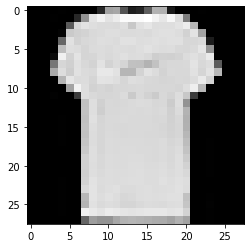

In [0]:
print_img(X_train[10])
# print(y_train[0])

In [0]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()
y_train = one.fit_transform(y_train.reshape(-1, 1)).toarray()
y_train.shape

(60000, 10)

# NN

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [0]:
# model created
model = Sequential()
print(X_train.shape)

(60000, 784)


In [0]:
# first layer
model.add(Dense(units= 256, activation= 'relu', input_shape = (784,)))
model.add(Dropout(rate = 0.25))

In [0]:
# hidden layer
model.add(Dense(units= 256, activation= 'relu'))
model.add(Dropout(rate= 0.25))

In [0]:
#output layer
model.add(Dense(units= 10, activation = 'softmax'))

In [0]:
#model compilation
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [0]:
# model summary
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(X_train, y_train, batch_size= 128, epochs= 20, validation_split= 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 65us/step - loss: 0.5999 - accuracy: 0.7838 - val_loss: 0.4264 - val_accuracy: 0.8449
Epoch 2/20
48000/48000 [==============================] - 3s 62us/step - loss: 0.4265 - accuracy: 0.8444 - val_loss: 0.3877 - val_accuracy: 0.8608
Epoch 3/20
48000/48000 [==============================] - 3s 62us/step - loss: 0.3886 - accuracy: 0.8567 - val_loss: 0.3726 - val_accuracy: 0.8657
Epoch 4/20
48000/48000 [==============================] - 3s 61us/step - loss: 0.3619 - accuracy: 0.8667 - val_loss: 0.3751 - val_accuracy: 0.8614
Epoch 5/20
48000/48000 [==============================] - 3s 59us/step - loss: 0.3454 - accuracy: 0.8732 - val_loss: 0.3459 - val_accuracy: 0.8787
Epoch 6/20
48000/48000 [==============================] - 3s 59us/step - loss: 0.3310 - accuracy: 0.8776 - val_loss: 0.3346 - val_accuracy: 0.8806
Epoch 7/20
48000/48000 [==============================] - 3s 59us/st

In [0]:
model.history.history

{'accuracy': [0.7838125,
  0.84435415,
  0.85672915,
  0.86672914,
  0.87322915,
  0.87764585,
  0.88220835,
  0.88354164,
  0.88754165,
  0.8908542,
  0.8921875,
  0.89341664,
  0.8976667,
  0.89814585,
  0.900375,
  0.901875,
  0.90497917,
  0.90564585,
  0.90652084,
  0.9071875],
 'loss': [0.5998955477873484,
  0.4265127380688985,
  0.38856954244772596,
  0.36193102606137595,
  0.3454290957848231,
  0.3310223304828008,
  0.3199131118059158,
  0.3129680335919062,
  0.2993416761557261,
  0.292033983985583,
  0.2900057247877121,
  0.2845038232008616,
  0.2749522796670596,
  0.27171292106310524,
  0.26344945414861043,
  0.2585746161341667,
  0.2524532582958539,
  0.24920788357655208,
  0.2448243193825086,
  0.2451988115310669],
 'val_accuracy': [0.8449166417121887,
  0.8608333468437195,
  0.8656666874885559,
  0.8614166378974915,
  0.8786666393280029,
  0.8805833458900452,
  0.8818333148956299,
  0.8838333487510681,
  0.8882499933242798,
  0.887499988079071,
  0.8884999752044678,
  0.89

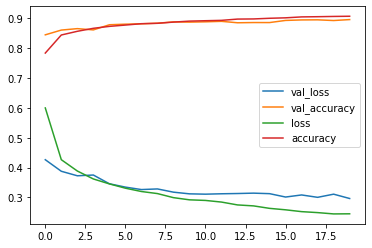

In [0]:
pd.DataFrame(model.history.history).plot()
plt.show()